In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

%matplotlib inline

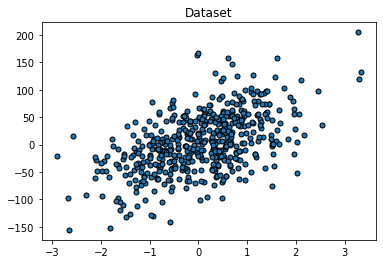

In [4]:
plt.figure(figsize=(6, 4))
plt.title("Dataset")
X, y = make_regression(n_samples=500, n_features=1, noise=50)
plt.scatter(X[:, 0], y, marker='o', s=25, edgecolor='k')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear Regression from Scratch

One dimension:

$y = mx + b$

Multidimensional:

$y = m_1x_1 + m_2x_2 + ... m_nx_n + b$

y = 30.683751064982992 * x + 3.3144909212294693


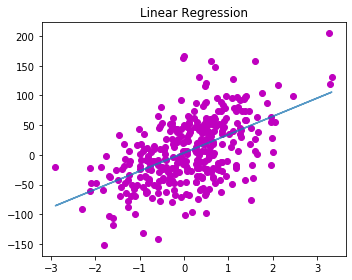

In [20]:
def linear_regression(x, y):
    """Simple Linear Regression : One dimension only."""
    # covariance
    N = len(x)
    c_xy = np.sum(((x - np.mean(x)) * (y - np.mean(y))) / N)
    b = c_xy / np.var(x)
    a = np.mean(y) - (b * np.mean(x))
    return a + (b * x)

def linear_regression_mul(x, y):
    """Multivariate Linear Regression : Multidimensional."""
    x = np.array(x)
    m, c = np.linalg.lstsq(x, y, rcond=-1)[0]
    return m, c, np.dot(x, m)

A = np.c_[X_train, np.ones(len(X_train))]
m, c, pred = linear_regression_mul(A, y_train)
e = c + (X_train * m)

print(f"y = {m} * x + {c}")
plt.figure(figsize=(5, 4))
plt.title(f'Linear Regression')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e, alpha=.75)
plt.tight_layout()
plt.show()

#### Linear Regression using Scikit-Learn

y = 30.683751064983 * x + 3.3144909212294684


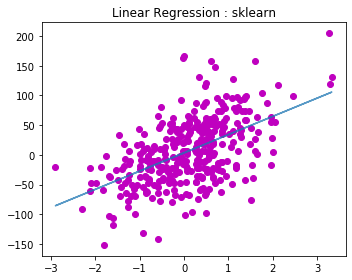

In [21]:
A = np.c_[X_train, np.ones(len(X_train))]
reg = LinearRegression().fit(A, y_train)
e_sk_value = (reg.coef_ * A) + reg.intercept_

print(f"y = {reg.coef_[0]} * x + {reg.intercept_}")
plt.figure(figsize=(5, 4))
plt.title('Linear Regression : sklearn')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e_sk_value[:, 0], alpha=.75)
plt.tight_layout()
plt.show()